In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [129]:
oportunidades = pd.read_csv('Entrenamiento_ECI_2020.csv')
oportunidades['Account_Created_Date'] = pd.to_datetime(oportunidades['Account_Created_Date'])
oportunidades['Opportunity_Created_Date'] = pd.to_datetime(oportunidades['Opportunity_Created_Date'])
oportunidades['Quote_Expiry_Date'] = pd.to_datetime(oportunidades['Quote_Expiry_Date'])
oportunidades['Last_Modified_Date'] = pd.to_datetime(oportunidades['Last_Modified_Date'])
oportunidades['Planned_Delivery_Start_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_Start_Date'])
oportunidades['Planned_Delivery_End_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_End_Date'])
oportunidades = oportunidades.dropna()
oportunidades['Region'] = oportunidades['Region'].replace({'Japan':'APAC', 'Middle East':'EMEA'})
oportunidades.head(5)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None


In [130]:
#Filtramos datos no útiles como en el notebook de ClosedWon

oportunidades = oportunidades.loc[oportunidades['Territory'] != 'None']

filtro_terminos_entrega = oportunidades['Pricing, Delivery_Terms_Quote_Appr']\
     == oportunidades['Pricing, Delivery_Terms_Approved']

filtro_codigo_burocratico = oportunidades['Bureaucratic_Code_0_Approval']\
     == oportunidades['Bureaucratic_Code_0_Approved']

oportunidades = oportunidades.drop(['Pricing, Delivery_Terms_Quote_Appr'\
    ,'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval'\
        , 'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval'], axis = 'columns')

oportunidades_posibles = (filtro_terminos_entrega & filtro_codigo_burocratico)

oportunidades.insert(3,'Es_Oportunidad_Posible', oportunidades_posibles)

oportunidades['Es_Oportunidad_Posible'] = oportunidades['Es_Oportunidad_Posible'].replace(
    {True:1, False:0})
oportunidades

,ID,Region,Territory,Es_Oportunidad_Posible,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
2,27446,Americas,NW America,1,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,...,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
4,16805,Americas,NW America,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,...,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_939,...,Q1,2018,NaT,28,USD,14838277.50,USD,14838277.5,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,...,Q1,2016,NaT,0,USD,50688.00,USD,50688.0,Closed Won,Prod_Category_A_None
23,28524,APAC,India,1,Bureaucratic_Code_4,2015-10-13,None,India,Account_Name_1147,Opportunity_Name_7036,...,Q1,2016,NaT,3,USD,1621851.00,USD,1621851.0,Closed Won,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16939,18324,EMEA,Norway,1,Bureaucratic_Code_4,2013-07-27,Source_9,Germany,Account_Name_533,Opportunity_Name_7202,...,Q2,2016,NaT,1,EUR,401700.00,EUR,401700.0,Closed Won,Prod_Category_A_None
16940,20827,Americas,NE America,0,Bureaucratic_Code_5,2014-06-16,None,Germany,Account_Name_404,Opportunity_Name_11979,...,Q4,2016,NaT,20,USD,10751580.00,USD,21332500.0,Closed Lost,Prod_Category_A_None
16941,20830,Americas,NE America,0,Bureaucratic_Code_5,2014-06-16,None,Germany,Account_Name_404,Opportunity_Name_11979,...,Q4,2016,NaT,20,USD,10580920.00,USD,21332500.0,Closed Lost,Prod_Category_A_None
16945,28561,Americas,NE America,1,Bureaucratic_Code_4,2015-10-20,None,United States,Account_Name_944,Opportunity_Name_5843,...,Q2,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None


In [131]:
#Obtenemos las columnas de total_amount y total_taxable_amount para cada una de las oportunidades.

oportunidades_amount = oportunidades.groupby('Opportunity_ID').agg({'Total_Amount': 'sum', 'Total_Taxable_Amount': 'mean'})
oportunidades_amount['Total_Amount'] = oportunidades_amount['Total_Amount'].round(1)
oportunidades_amount['Total_Taxable_Amount'] = oportunidades_amount['Total_Taxable_Amount'].round(1)
oportunidades_amount

,Total_Amount,Total_Taxable_Amount
Opportunity_ID,,
2,83865.6,83865.6
4,13357192.5,13357192.5
5,14838277.5,14838277.5
7,50688.0,50688.0
11,1621851.0,1621851.0
...,...,...
12798,1307775.0,1307775.0
12799,401700.0,401700.0
12800,21332500.0,21332500.0


(-1.1350850871915132,
 1.1016707184376728,
 -1.09854864759943,
 1.1160594002098791)

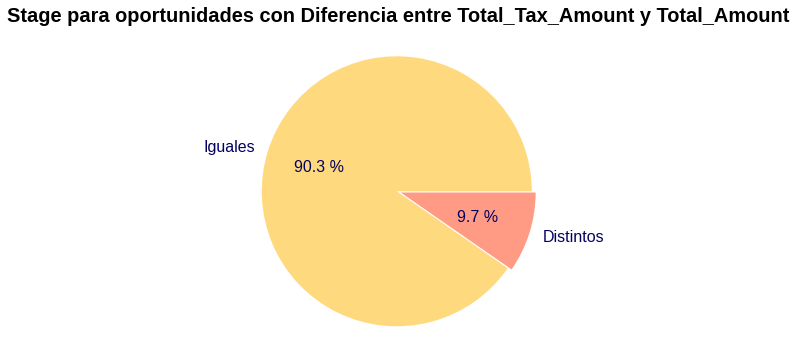

In [149]:
#Conociendo las columnas puedo ver si alguna de estas tiene distinto taxable amount de total amount.
oportunidades_amount_loc = oportunidades_amount.loc[oportunidades_amount['Total_Amount'] != oportunidades_amount\
                                                    ['Total_Taxable_Amount']]
total = (oportunidades['Total_Amount'].nunique())
distintos = (oportunidades_amount_loc['Total_Amount'].nunique())
porcentaje_distintos = (distintos/total)
porcentaje_iguales = (total-distintos)/total

data = {
    "Tax y Tot_Amount":["Iguales","Distintos"],
    "Porcentaje": [porcentaje_iguales, porcentaje_distintos]
}

para_pie_plot = pd.DataFrame(data)
para_pie_plot

colores = ["#FFD97D","#FF9B85"]
desfase = [0.03, 0.0]

ax = plt.pie(para_pie_plot['Porcentaje'], labels = para_pie_plot['Tax y Tot_Amount'], autopct="%0.1f %%", \
        textprops={'fontsize': 16, 'color': '#02025F'}, colors = colores, explode=desfase)
plt.title('Stage para oportunidades con Diferencia entre Total_Tax_Amount y Total_Amount', 
             pad = 20, 
             fontdict={'fontsize':20, 'weight':'bold', 'color': '#000000'})
plt.axis("equal")

In [133]:
# Debido a que poseemos 616 elementos con diferencia entre su total amount y su taxable amount, 
# queremos ver si esto afecta a los casos de closed won o lost

oportunidades_amount_loc = oportunidades_amount_loc.reset_index()
oportunidades_amount_loc.columns = ['Opportunity_ID', 'Total_Amount_Sumado', 'Total_Tax_Amount_Comparado']
oportunidades_dif_amount = oportunidades.merge(oportunidades_amount_loc, on='Opportunity_ID')
oportunidades_dif_amount = oportunidades_dif_amount.drop_duplicates('Opportunity_ID', keep='last')
oportunidades_dif_amount_stage = oportunidades_dif_amount[['Stage', 'Opportunity_ID']]
oportunidades_dif_amount_stage = oportunidades_dif_amount_stage.set_index('Opportunity_ID')
oportunidades_dif_amount_stage = oportunidades_dif_amount_stage.loc[(oportunidades_dif_amount_stage['Stage'] == 'Closed Lost') |\
                                                                    (oportunidades_dif_amount_stage['Stage'] == 'Closed Won')]
oportunidades_dif_amount_stage

,Stage
Opportunity_ID,
27,Closed Won
47,Closed Lost
59,Closed Won
96,Closed Lost
118,Closed Lost
...,...
12745,Closed Won
12748,Closed Won
12769,Closed Lost


(-1.1175701244980358,
 1.1008366725951446,
 -1.1254346198594547,
 1.1430391607921762)

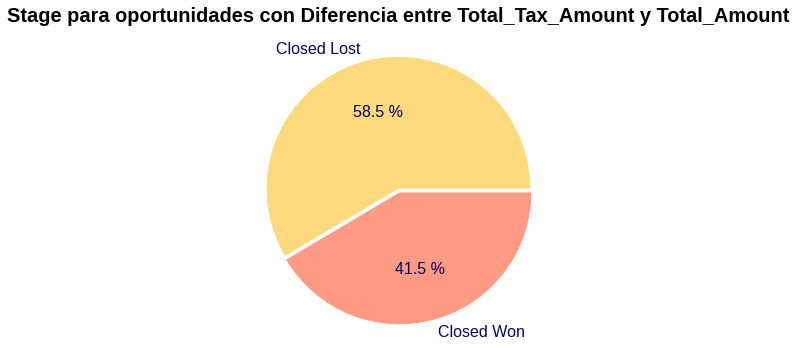

In [134]:
# Conociendo los stage de cada uno podemos ver que porcentaje lidera en la diferencia, si closed lost o closed won, y
# por otro lado podemos analizar cual es el delta amount. Si es negativo es porque tiene mas tasa impositiva que total amount.
# Si es positivo, es lo contrario, menor tasa impositiva, que total amount.

colores = ["#FFD97D","#FF9B85"]
desfase = [0.03, 0.0]

oportunidades_dif_amount_stage = oportunidades_dif_amount_stage.reset_index()
oportunidades_count = oportunidades_dif_amount_stage.groupby('Stage').count()
oportunidades_count = oportunidades_count.reset_index()
ax = plt.pie(oportunidades_count['Opportunity_ID'], labels = oportunidades_count['Stage'], autopct="%0.1f %%", \
        textprops={'fontsize': 16, 'color': '#02025F'}, colors = colores, explode=desfase)
plt.title('Stage para oportunidades con Diferencia entre Total_Tax_Amount y Total_Amount', 
             pad = 20, 
             fontdict={'fontsize':20, 'weight':'bold', 'color': '#000000'})
plt.axis("equal")

Text(0, 0.5, 'Total Taxable Amount')

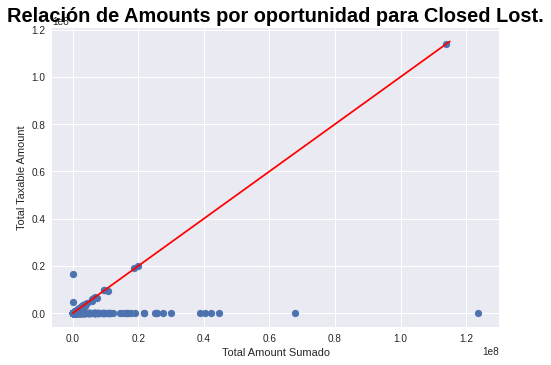

In [135]:
# Ademas, podemos ver si en cada closed lost el delta es negativo como se supondría que debería suceder, o si
# es distinto a lo que esperariamos (Lo mismo para closed wons.)

lineal = [0, 1.15e8]

oportunidades_dif_amount_scat = oportunidades_dif_amount.loc[oportunidades_dif_amount['Stage'] == 'Closed Lost']
ax = plt.scatter(x = oportunidades_dif_amount_scat['Total_Amount_Sumado'], y= oportunidades_dif_amount_scat['Total_Taxable_Amount'])
plt.plot(lineal, lineal, color = 'red')
plt.title('Relación de Amounts por oportunidad para Closed Lost.', fontdict={'fontsize':20, 'weight':'bold', 'color': '#000000'})
plt.xlabel('Total Amount Sumado')
plt.ylabel('Total Taxable Amount')

Text(0, 0.5, 'Total Taxable Amount')

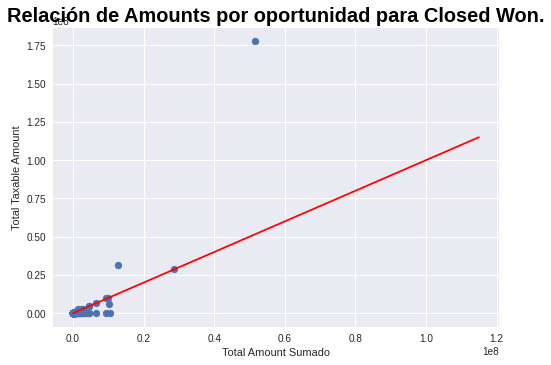

In [136]:
# Haciendo lo mismo para closed won

lineal = [0, 1.15e8]

oportunidades_dif_amount_scat = oportunidades_dif_amount.loc[oportunidades_dif_amount['Stage'] == 'Closed Won']
ax = plt.scatter(x = oportunidades_dif_amount_scat['Total_Amount_Sumado'], y= oportunidades_dif_amount_scat['Total_Taxable_Amount'])
plt.plot(lineal, lineal, color = 'red')
plt.title('Relación de Amounts por oportunidad para Closed Won.', fontdict={'fontsize':20, 'weight':'bold', 'color': '#000000'})
plt.xlabel('Total Amount Sumado')
plt.ylabel('Total Taxable Amount')

Text(0, 0.5, 'Total Amount')

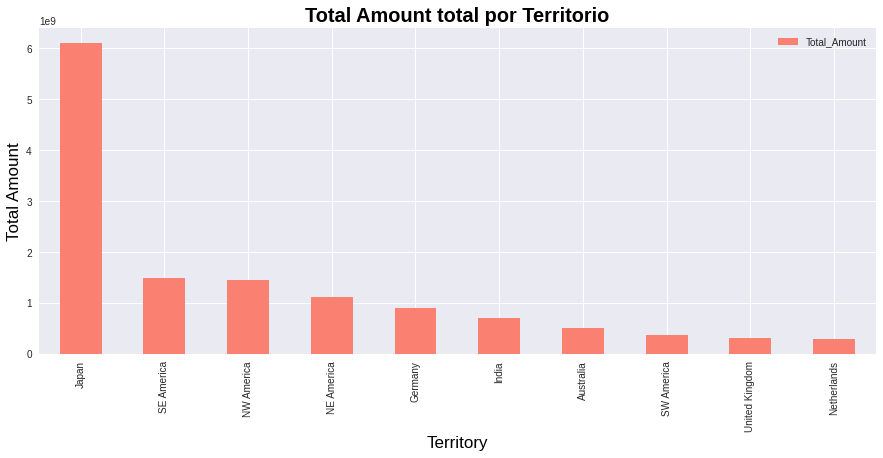

In [137]:
# También se puede analizar que países tienen mayor Total_Amount para saber en cual de estos se factura más.

oportunidades_total_amount = oportunidades.groupby('Territory').agg({'Total_Amount':'sum'})
oportunidades_total_amount.nlargest( 10, 'Total_Amount')
oportunidades_total_amount_top_10 = oportunidades_total_amount.nlargest(10, 'Total_Amount')
#plt.
oportunidades_total_amount_top_10.plot(kind = 'bar', linewidth = 4,\
                                       figsize = (15,6), color = "salmon")
plt.title('Total Amount total por Territorio', fontdict={'fontsize':20, 'weight':'bold', 'color': '#000000'})
plt.xlabel('Territory', fontdict={'fontsize':17, 'color': '#000000'})
plt.ylabel('Total Amount', fontdict={'fontsize':17, 'color': '#000000'})